# Stock News Sentiment Analysis with NLP

The goal of this project is to:
1. Load and explore stock market news headlines
2. Clean and preprocess the text data using NLTK
3. Perform sentiment analysis (positive/negative/neutral)
4. Create clusters of similar news articles
5. Visualize our findings

## Step 1: Import Libraries

First, let's import all the libraries we need for NLP analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

print('Libraries imported successfully!')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


Libraries imported successfully!


[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Step 2: Load the Data

We'll load the Google News stock RSS feed data containing news headlines about the stock market.

In [3]:
# Load the news data
df = pd.read_csv('./data/google_news_stock_rss.csv')

print(f"Loaded {len(df)} news articles")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Loaded 100 news articles

Columns: ['title', 'published', 'link']


,title,published,link
0,"Stock market today: Dow, S&P 500, Nasdaq futur...","Mon, 12 Jan 2026 11:24:07 GMT",https://news.google.com/rss/articles/CBMi5wFBV...
1,Dow futures fall 300 point as Trump's DOJ open...,"Mon, 12 Jan 2026 11:35:00 GMT",https://news.google.com/rss/articles/CBMid0FVX...
2,"Stock Market Today: Dow Futures Fall, Gold Hit...","Mon, 12 Jan 2026 10:53:00 GMT",https://news.google.com/rss/articles/CBMijANBV...
3,Stock Market Today: Dow set for 400-point drop...,"Mon, 12 Jan 2026 11:20:00 GMT",https://news.google.com/rss/articles/CBMi2wNBV...
4,"Capital One, American Express, JPMorgan, Nvidi...","Mon, 12 Jan 2026 11:01:00 GMT",https://news.google.com/rss/articles/CBMi6gJBV...


In [4]:
# Basic info about the dataset
print("Dataset Info:")
print(f"  Total articles: {len(df)}")
print(f"  Missing titles: {df['title'].isna().sum()}")
print(f"\nSample headlines:")
for i, title in enumerate(df['title'].head(5)):
    print(f"  {i+1}. {title[:80]}...")

Dataset Info:
  Total articles: 100
  Missing titles: 0

Sample headlines:
  1. Stock market today: Dow, S&P 500, Nasdaq futures slide on threat to Fed as Trump...
  2. Dow futures fall 300 point as Trump's DOJ opens criminal investigation into Fed ...
  3. Stock Market Today: Dow Futures Fall, Gold Hits Record After Prosecutors Launch ...
  4. Stock Market Today: Dow set for 400-point drop, S&P 500 and Nasdaq to retreat af...
  5. Capital One, American Express, JPMorgan, Nvidia, Alphabet, Walmart, and More Sto...


## Step 3: Text Preprocessing

Before we can analyze the text, we need to clean it:
- **Lowercase**: Convert all text to lowercase
- **Remove special characters**: Keep only letters and numbers
- **Tokenize**: Split text into individual words
- **Remove stopwords**: Remove common words like "the", "is", "at"
- **Lemmatize**: Reduce words to their base form (e.g., "running" → "run")

In [5]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Clean and preprocess a text string."""
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize (split into words)
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    cleaned_tokens = [
        lemmatizer.lemmatize(word) 
        for word in tokens 
        if word not in stop_words and len(word) > 2
    ]
    
    return ' '.join(cleaned_tokens)

# Apply cleaning to all titles
df['cleaned_title'] = df['title'].apply(clean_text)

print("Text preprocessing complete!")
print("\nExample:")
print(f"  Original: {df['title'].iloc[0][:60]}...")
print(f"  Cleaned:  {df['cleaned_title'].iloc[0][:60]}...")

Text preprocessing complete!

Example:
  Original: Stock market today: Dow, S&P 500, Nasdaq futures slide on th...
  Cleaned:  stock market today dow nasdaq future slide threat fed trump ...


## Step 4: Sentiment Analysis

We'll use NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner) to analyze sentiment.

VADER gives us:
- **Positive score**: How positive the text is (0-1)
- **Negative score**: How negative the text is (0-1)
- **Neutral score**: How neutral the text is (0-1)
- **Compound score**: Overall sentiment (-1 to +1)

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    """Get sentiment scores for a text."""
    if pd.isna(text) or text == "":
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
    return sia.polarity_scores(text)

# Apply sentiment analysis to original titles (VADER works better with original text)
sentiment_scores = df['title'].apply(get_sentiment)

# Extract scores into separate columns
df['sentiment_pos'] = sentiment_scores.apply(lambda x: x['pos'])
df['sentiment_neg'] = sentiment_scores.apply(lambda x: x['neg'])
df['sentiment_neu'] = sentiment_scores.apply(lambda x: x['neu'])
df['sentiment_compound'] = sentiment_scores.apply(lambda x: x['compound'])

print("Sentiment analysis complete!")
df[['title', 'sentiment_compound']].head()

Sentiment analysis complete!


,title,sentiment_compound
0,"Stock market today: Dow, S&P 500, Nasdaq futur...",-0.7783
1,Dow futures fall 300 point as Trump's DOJ open...,-0.5267
2,"Stock Market Today: Dow Futures Fall, Gold Hit...",0.0000
3,Stock Market Today: Dow set for 400-point drop...,-0.0772
4,"Capital One, American Express, JPMorgan, Nvidi...",0.0000


In [7]:
# Classify sentiment into categories
def classify_sentiment(compound_score):
    """Classify sentiment based on compound score."""
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_compound'].apply(classify_sentiment)

# Count sentiments
sentiment_counts = df['sentiment_label'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)
print(f"\nTotal: {len(df)} articles")

Sentiment Distribution:
sentiment_label
Neutral     43
Negative    30
Positive    27
Name: count, dtype: int64

Total: 100 articles


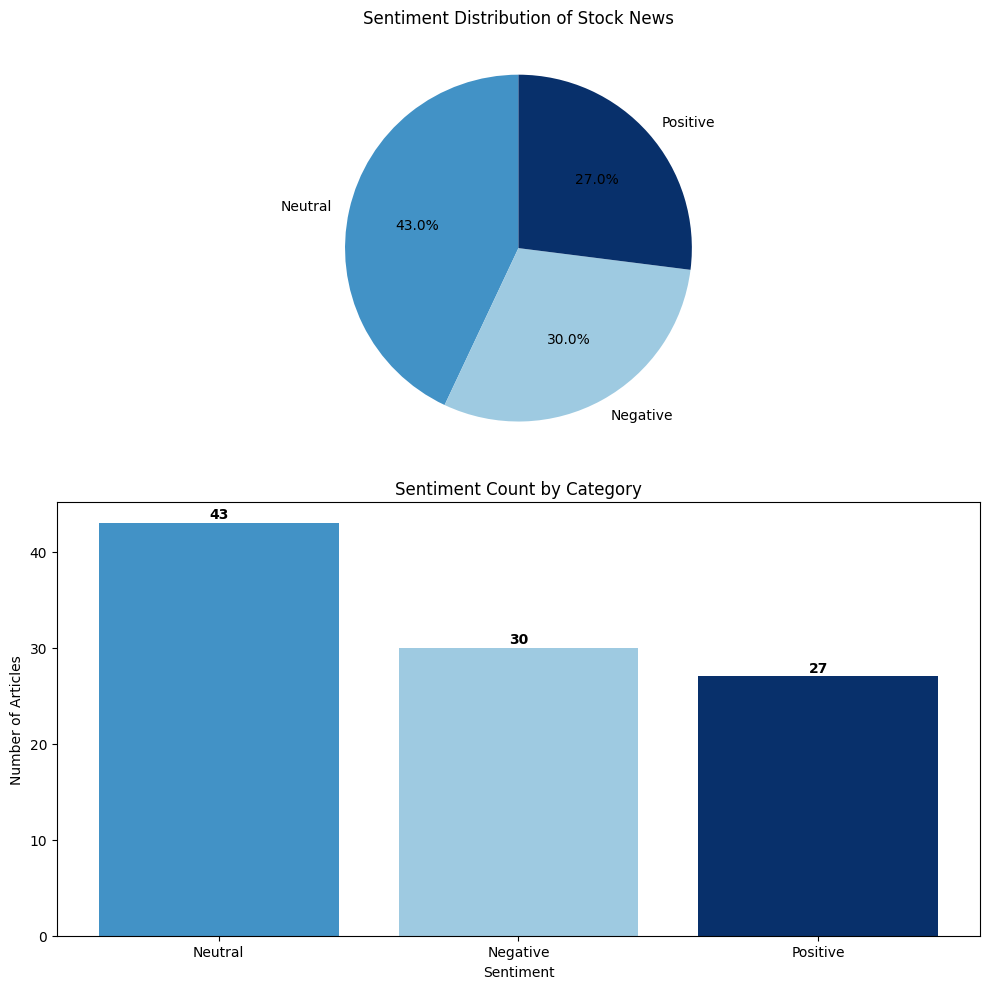

In [8]:
# Visualize sentiment distribution
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Pie chart (top)
colors = {'Positive': '#08306b', 'Neutral': '#4292c6', 'Negative': '#9ecae1'}
sentiment_counts = df['sentiment_label'].value_counts()
axes[0].pie(sentiment_counts.values, 
            labels=sentiment_counts.index, 
            autopct='%1.1f%%',
            colors=[colors[x] for x in sentiment_counts.index],
            startangle=90)
axes[0].set_title('Sentiment Distribution of Stock News')

# Bar chart (bottom)
axes[1].bar(sentiment_counts.index, sentiment_counts.values, 
            color=[colors[x] for x in sentiment_counts.index])
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Number of Articles')
axes[1].set_title('Sentiment Count by Category')
for i, v in enumerate(sentiment_counts.values):
    axes[1].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [22]:
# Show examples of each sentiment
print("="*70)
print("SAMPLE HEADLINES BY SENTIMENT")
print("="*70)

for sentiment in ['Positive', 'Neutral', 'Negative']:
    print(f"\n {sentiment.upper()} Headlines:")
    samples = df[df['sentiment_label'] == sentiment]['title'].head(3)
    for i, title in enumerate(samples, 1):
        print(f"   {i}. {title[:75]}...")

SAMPLE HEADLINES BY SENTIMENT

 POSITIVE Headlines:
   1. Magnificent 7’s stock market dominance shows signs of cracking - Fortune...
   2. 2026 US Stock Market Outlook: Where to Find Investing Opportunities - Morni...
   3. Why the stock market could easily get spooked - Yahoo Finance...

 NEUTRAL Headlines:
   1. Stock Market Today: Dow Futures Fall, Gold Hits Record After Prosecutors La...
   2. Capital One, American Express, JPMorgan, Nvidia, Alphabet, Walmart, and Mor...
   3. After Three Hot Years, Will Stock Markets Sizzle Again? - The New York Time...

 NEGATIVE Headlines:
   1. Stock market today: Dow, S&P 500, Nasdaq futures slide on threat to Fed as ...
   2. Dow futures fall 300 point as Trump's DOJ opens criminal investigation into...
   3. Stock Market Today: Dow set for 400-point drop, S&P 500 and Nasdaq to retre...


## Step 5: Word Frequency Analysis

Let's see which words appear most frequently in the news headlines.

In [10]:
from collections import Counter

# Get all words from cleaned titles
all_words = ' '.join(df['cleaned_title']).split()

# Count word frequencies
word_counts = Counter(all_words)
top_20_words = word_counts.most_common(20)

print("Top 20 Most Frequent Words:")
for word, count in top_20_words:
    print(f"  {word}: {count}")

Top 20 Most Frequent Words:
  stock: 83
  market: 68
  dow: 26
  yahoo: 20
  finance: 20
  today: 19
  street: 15
  future: 14
  record: 14
  wall: 14
  news: 14
  investor: 13
  journal: 12
  fed: 11
  nasdaq: 10
  trump: 10
  year: 10
  rally: 10
  powell: 9
  high: 9


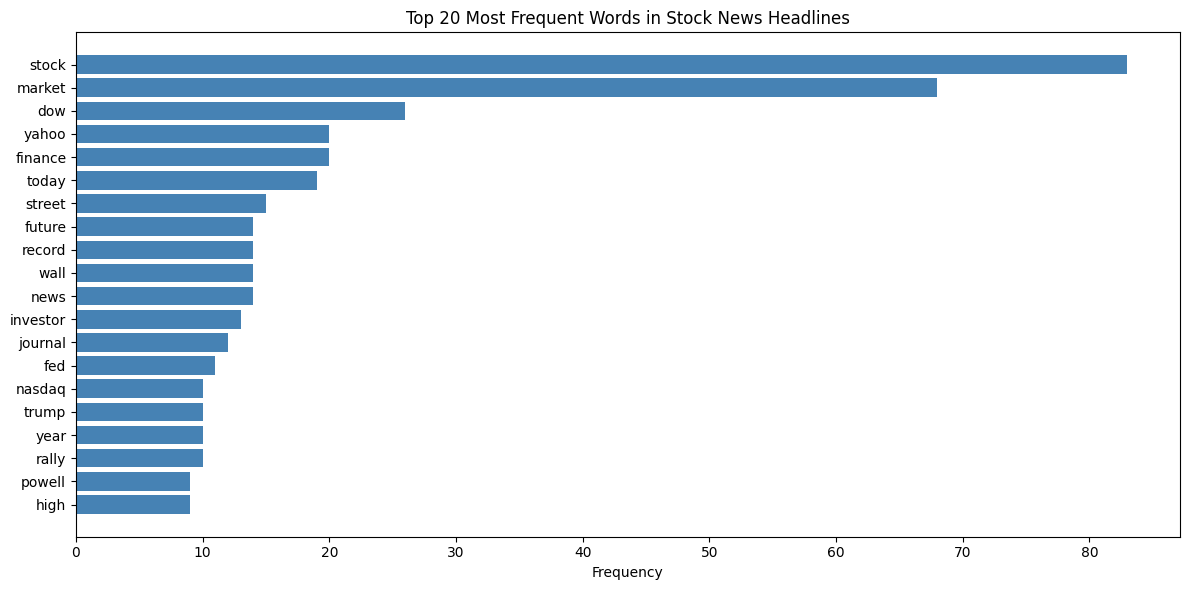

In [11]:
# Visualize word frequency
words = [w[0] for w in top_20_words]
counts = [w[1] for w in top_20_words]

plt.figure(figsize=(12, 6))
plt.barh(words[::-1], counts[::-1], color='steelblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words in Stock News Headlines')
plt.tight_layout()
plt.show()

## Summary

This project included:

1. **Load and explore** stock market news headlines
2. **Preprocess text** using NLTK (tokenization, stopword removal, lemmatization)
3. **Perform sentiment analysis** using VADER to classify headlines as positive, negative, or neutral
4. **Analyze word frequency** to find the most common terms in the news
5. **Visualize results** with charts and summary tables

**Key NLP Concepts Used:**
- **Tokenization**: Splitting text into individual words
- **Stopword Removal**: Removing common words that don't add meaning
- **Lemmatization**: Reducing words to their base form
- **TF-IDF**: Converting text to numerical vectors
- **VADER Sentiment**: Analyzing emotional tone of text